# APS 1 : Transferência de Calor

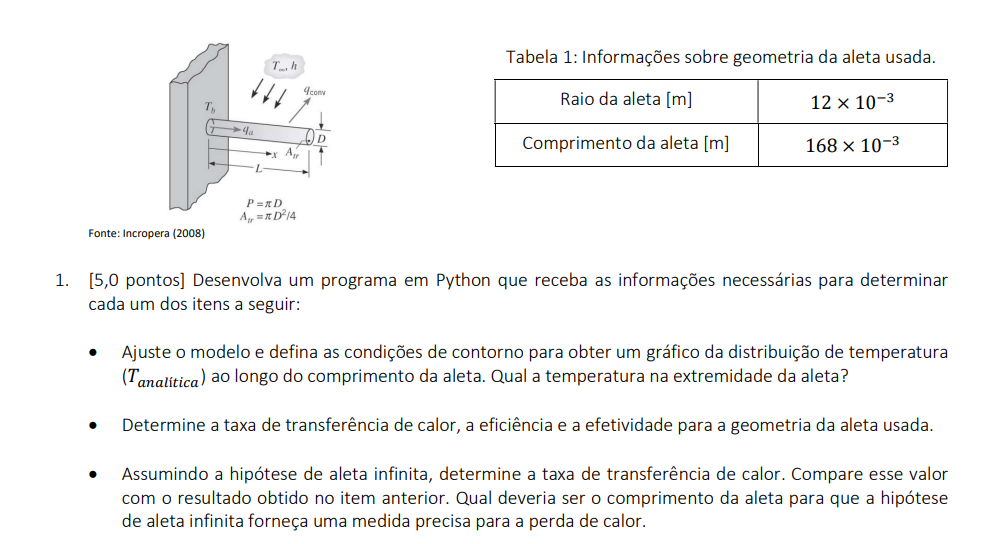

In [15]:
# imports

from math import *

import matplotlib.pyplot as plt 

import numpy as np


#Informaçoes da aleta


def perimetro_aleta(diametro):
    
    return pi*diametro

def area_aleta(diametro):
    
    return (pi*diametro**2)/4

def calcula_m(h,P,A_tr,k):
    
    return sqrt((h*P)/(A_tr*k))

def transf_calor_geral (h,P,A_tr,k,L,T_amb,T_b,x):
    
    m = calcula_m(h,P,A_tr,k)
    
    num = cosh(m*(L-x))+(h/(m*k))*sinh(m*(L-x))
    
    den = cosh(m*L)+(h/(m*k))*sinh(m*L)
    
    res= num/den
    
    T_l = (T_b-T_amb)*res+ T_amb
    
    return T_l


# Constantes

# Temperatura do ambiente[K]:
T_amb = 298

# Temperatura da base[K]:
T_b = 373

# Raio da Aleta [m]:
r_aleta = 12e-3 

#Comprimento da aleta [m]:
L = 168e-3

# Diametro da aleta [m] :
diametro_aleta = r_aleta*2

# h -> coeficiente de convecção térmica [W/m^2K]:
h = 12

# P -> Perimetro da aleta [m]:
P = perimetro_aleta(diametro_aleta)

# A_tr -> Área tranversal da Aleta [m^2]:
A_tr = area_aleta(diametro_aleta)

# k -> coeficiente de condutividade térmica [W/mk]:
k = 154.808



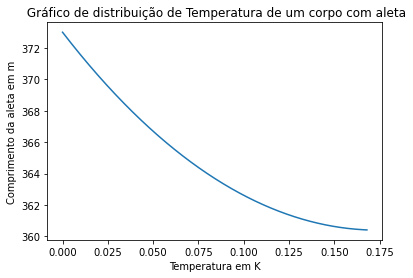

In [18]:
# Calculando o array de valores de x=0 a L de temperatura do corpo com a aleta
distribuicao_T = []

# Calculando o array de valores X´s
x_array = np.arange(0,L,1e-6)

for x in x_array :
    
    distribuicao_T.append(transf_calor_geral(h,P,A_tr,k,L,T_amb,T_b,x))

plt.plot(x_array,distribuicao_T)
plt.xlabel("Temperatura em K")
plt.ylabel("Comprimento da aleta em m")
plt.title(" Gráfico de distribuição de Temperatura de um corpo com aleta")
plt.show()

